In [1]:
from qiskit import *

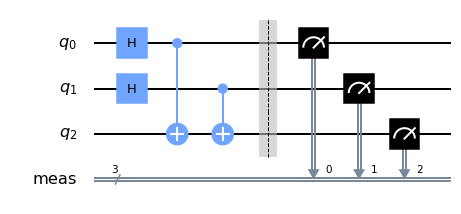

In [24]:
# XOR
qc = QuantumCircuit(3)

qc.h(range(2))
qc.cx(0, 2)
qc.cx(1, 2)

qc.measure_all()
qc.draw('mpl')

In [23]:
backend = Aer.get_backend('qasm_simulator')
execution = execute(qc, backend = backend, shots = 1024)    
results = execution.result()
counts = results.get_counts()
print(counts)

{'000': 262, '011': 255, '101': 261, '110': 246}


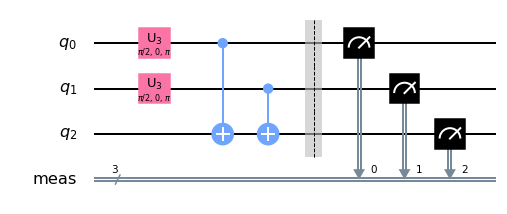

In [18]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 

new_circuit.draw('mpl')

In [19]:
new_circuit.count_ops()

OrderedDict([('measure', 3), ('u3', 2), ('cx', 2), ('barrier', 1)])

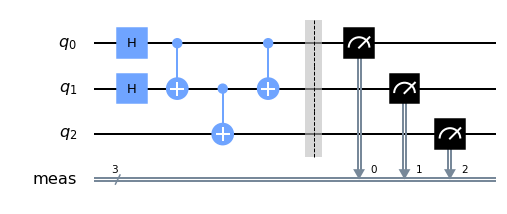

In [10]:
# XOR Alternative
qc = QuantumCircuit(3)

qc.h(range(2))
qc.cx(0, 1)
qc.cx(1, 2)
qc.cx(0, 1)    # reverse the change

qc.measure_all()
qc.draw('mpl')

In [11]:
backend = Aer.get_backend('qasm_simulator')
execution = execute(qc, backend = backend, shots = 1024)    
results = execution.result()
counts = results.get_counts()
print(counts)

{'000': 241, '011': 259, '101': 242, '110': 282}


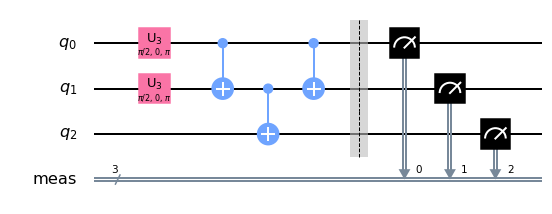

In [13]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 

new_circuit.draw('mpl')

In [14]:
new_circuit.count_ops()

OrderedDict([('cx', 3), ('measure', 3), ('u3', 2), ('barrier', 1)])